# Plot of Target Distribution by Counter Category

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, make_scorer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

#imbalanced learning


# import custom functions
from custom_functions import get_data_summary, our_metrics, eval_metrics#, evaluate_model

# import custom scorers
#from custom_functions import get_f15, get_f2, get_f3



# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# loading the data
# this contains all the numerical (unscaled) and dummies from categorical
df = pd.read_csv('data/df_processed_dmy.csv')

In [4]:
# Mapping 0 and 1 to strings 'Gaz and Electricity

df['counter_type_GAZ'] = df['counter_type_GAZ'].map({
    0: 'Electricity',
    1: 'Gaz', 
    })
df['counter_type_GAZ'].unique()

array(['Electricity', 'Gaz'], dtype=object)

In [5]:
# Set custom color palette
# from https://coolors.co/

colors = ['#2c1258','#b86a44'#, '#671f47', '#a22e54',  '#dabc66'
          ]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

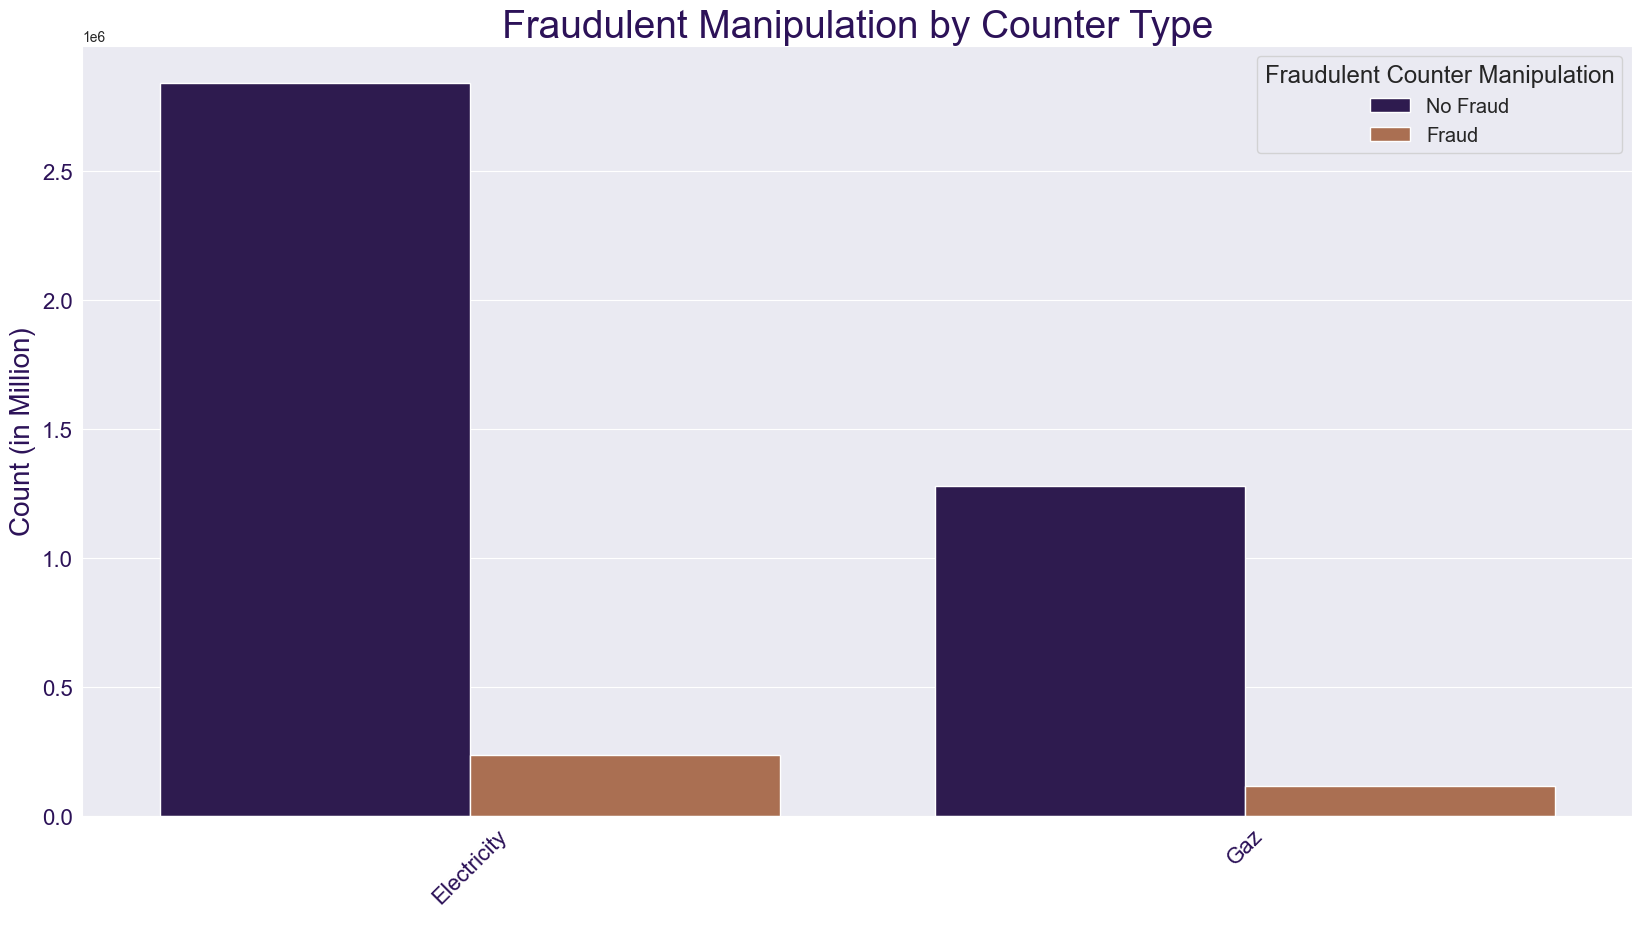

In [6]:
# plot countplot of target distribution by counter category

fig = plt.figure(figsize=(20,10))
g = sns.countplot(data=df, x='counter_type_GAZ', hue='target', color=customPalette)

plt.xticks(rotation=45)
plt.legend(
    title='Fraudulent Counter Manipulation',
    labels = ['No Fraud','Fraud'],
    fontsize='x-large',
    title_fontsize='xx-large')
plt.xlabel(' ');
plt.ylabel('Count (in Million)', fontsize=20, color='#2c1258');
plt.title('Fraudulent Manipulation by Counter Type', fontsize=28, color='#2c1258')
plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)
plt.show();
#plt.savefig('plots/target_distribution.jpg')

NameError: name 'df_kc_clean' is not defined

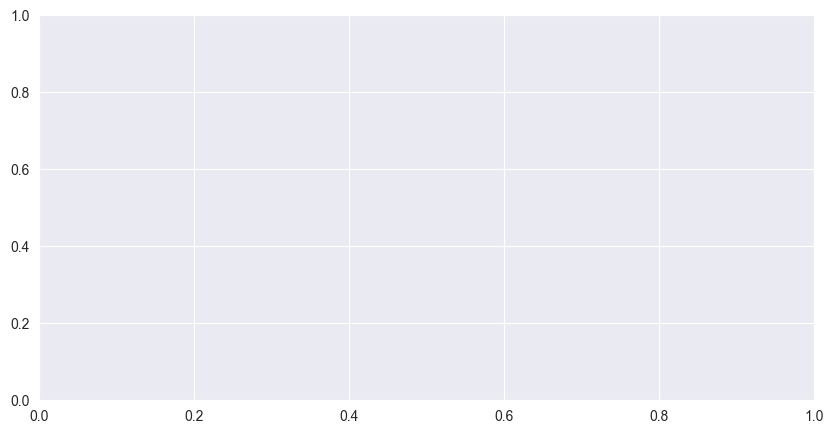

In [7]:
# plot countplot of target distribution by counter category

fig, ax = plt.subplots(figsize=(10,20))
sns.histplot(ax = ax, data=df, x='counter_type_GAZ', hue='target', color=customPalette, stat='probability')

sns.histplot(ax = ax, data = df_kc_low15, x='social_ngh', color='w', edgecolor='#ffac81', linewidth=2, binwidth=.8, bins=2, discrete=True, stat='probability', alpha=0.2)


plt.xticks(rotation=45)
plt.legend(
    title='Fraudulent Counter Manipulation',
    labels = ['No Fraud','Fraud'],
    fontsize='x-large',
    title_fontsize='xx-large')
plt.xlabel(' ');
plt.ylabel('Count (in Million)', fontsize=20, color='#2c1258');
plt.title('Fraudulent Manipulation by Counter Type', fontsize=28, color='#2c1258')
plt.xticks(color='#2c1258',fontsize=16)
plt.yticks(color='#2c1258', fontsize=16)
plt.show();

# plotting the housing distribution by neighborhood in lower price range vs. the entire data sample:

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ax = ax, data = df, x='counter_type_GAZ', color='w', edgecolor='#463f1a', linewidth=2, binwidth=.8, bins=2, discrete=True, stat='probability', alpha=0.2)

sns.histplot(ax = ax, data = df_kc_low15, x='social_ngh', color='w', edgecolor='#ffac81', linewidth=2, binwidth=.8, bins=2, discrete=True, stat='probability', alpha=0.2)

sns.set_style("darkgrid")
sns.despine()

ax.set_title('Housing Listings in King County', color='#7b3294')
ax.set_ylabel('')
ax.set_xlabel('Other Areas                                                      Desired Neighborhoods')
plt.xticks([])

ax.legend(['Total Price Range', 'Lower 15%'])

plt.savefig("figures/ngh_in_samples.jpg");

